### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('fast')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the train and test datasets
df1=pd.read_csv('train_agriculture.csv')
df2=pd.read_csv('test_agriculture.csv')

In [3]:
#Reading the top few records
df1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
#Getting some info about the train dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


**In the above info, we can see that the dataset is having 4599 entries. Except the ID, all other features are going to be significant for our analysis. Also, we can see a few NULL values in Number_Weeks_Used, while all the other columns have 4599 NOT NULL values.
Another observation is that Crop_Type, Soil_Type, Pesticide_Use_Category, Season and Crop_Damage are categorical variables while others are continous. 
Ourtarget variable will be Crop_Damage and this is a multi class classification problem.**

In [5]:
#Checking the NULL Values
df1.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

**We have a whopping 442 NULL values in the column Number_Weeks_Used**

In [6]:
#Getting some info about the train dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


**In the test dataset also, we have a few missing values in Number_Weeks_Used**

In [7]:
df2.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [8]:
#Let's drop the ID column first as this is not going to play a significant role in our analysis
df1.drop(columns=['ID'],axis=1,inplace=True)

In [9]:
df2.drop(columns=['ID'],axis=1,inplace=True)

In [10]:
df1.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


## Univariate and Bivariate Analysis

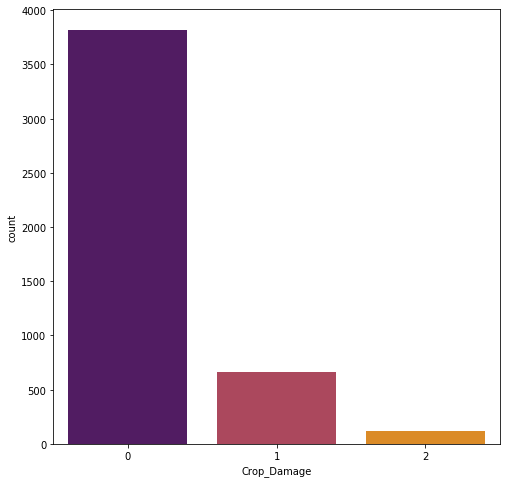

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [11]:
#Let us analyse the target variable first
sns.countplot(df1['Crop_Damage'],palette = 'inferno')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()
print(df1['Crop_Damage'].value_counts())

**In the above observation, we can see that for the training set, we do not have much datapoints to train for Crop Damage in the first and second category. These categories will be more prone to error and our accuracy will be suffering.**

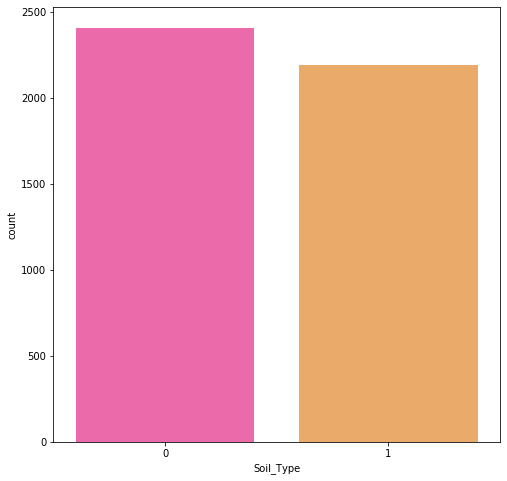

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [12]:
sns.countplot(df1['Soil_Type'],palette = 'spring')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()
print(df1['Soil_Type'].value_counts())

**We have an almost equal distribution of soil type in the dataset**

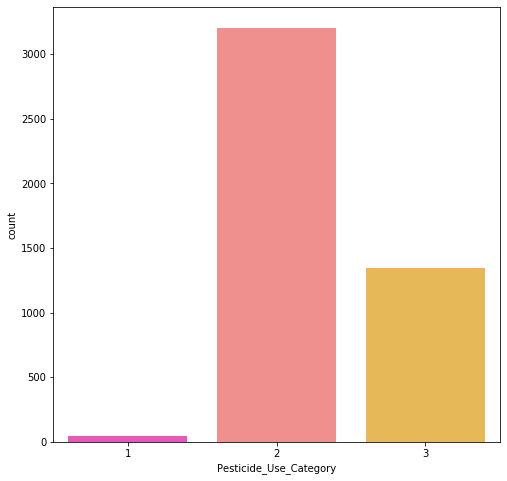

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


In [13]:
sns.countplot(df1['Pesticide_Use_Category'],palette = 'spring')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()
print(df1['Pesticide_Use_Category'].value_counts())

**Category 1 is used the least, followed by category 3 and then category 2 is the maximum**

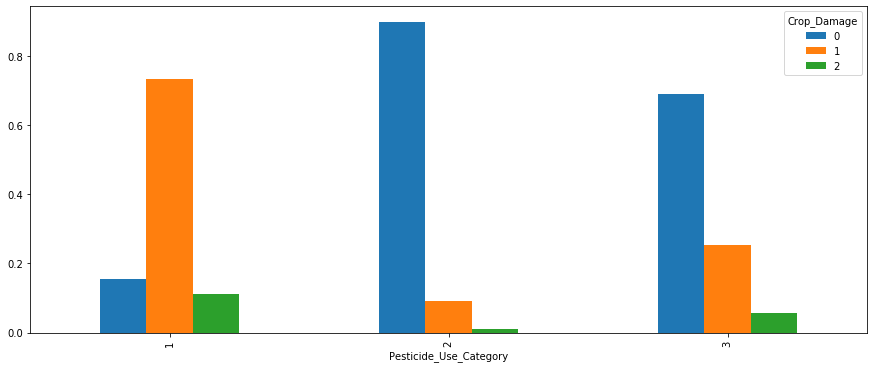

In [14]:
#Let's see which pesticide category is suited for our crops and which is not.
n=pd.crosstab(df1['Pesticide_Use_Category'],df1['Crop_Damage'])
n.div(n.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

**The above plot clearly indicates that pesticide category 1 is not healthy for our crops as it is damaging the crops in most of the instances. Also, we can see that pesticide category 2 is best suited for our crops. This also indicates that pesticide use category is a strong predictor for our model**

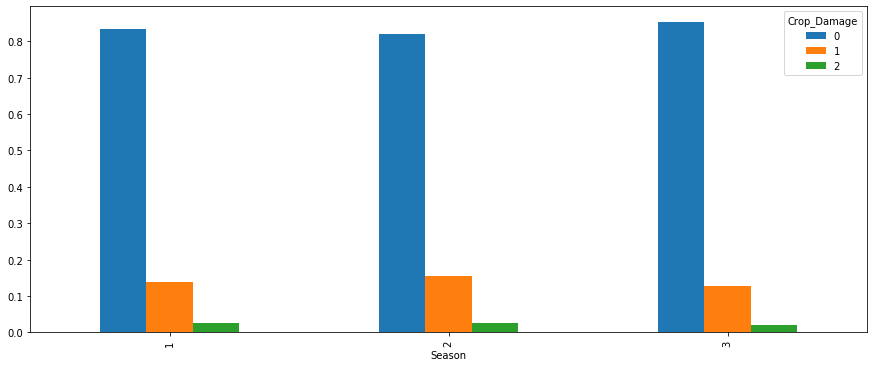

In [15]:
#Let's see how seasons are related to crop damage
n=pd.crosstab(df1['Season'],df1['Crop_Damage'])
n.div(n.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

**When it comes to season, there is not much of a difference between the 3 seasons in terms of crop damage. This shows that season is a weak predictor for our model**

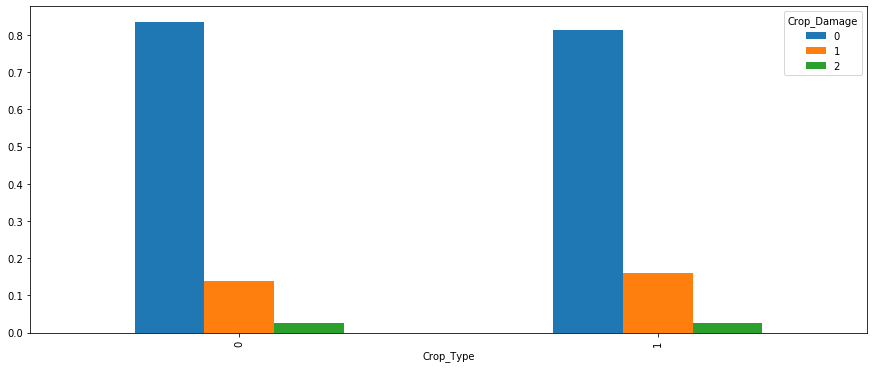

In [16]:
#let's se which type of crop is more prone to damage
n=pd.crosstab(df1['Crop_Type'],df1['Crop_Damage'])
ax=n.div(n.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))


**Here, we can see that Crop Type 1 is slightly more prone to crop damage from pesticides ascompared to crop type 2. Otherwise, this is also a weak predictor.**

In [17]:
#Correlation Check
df1.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


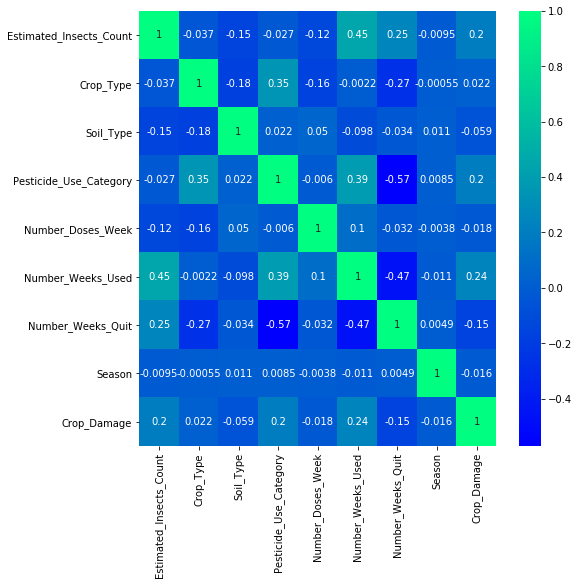

In [18]:
sns.heatmap(df1.corr(), annot=True, cmap='winter')
fig = plt.gcf()
fig.set_size_inches(8,8)

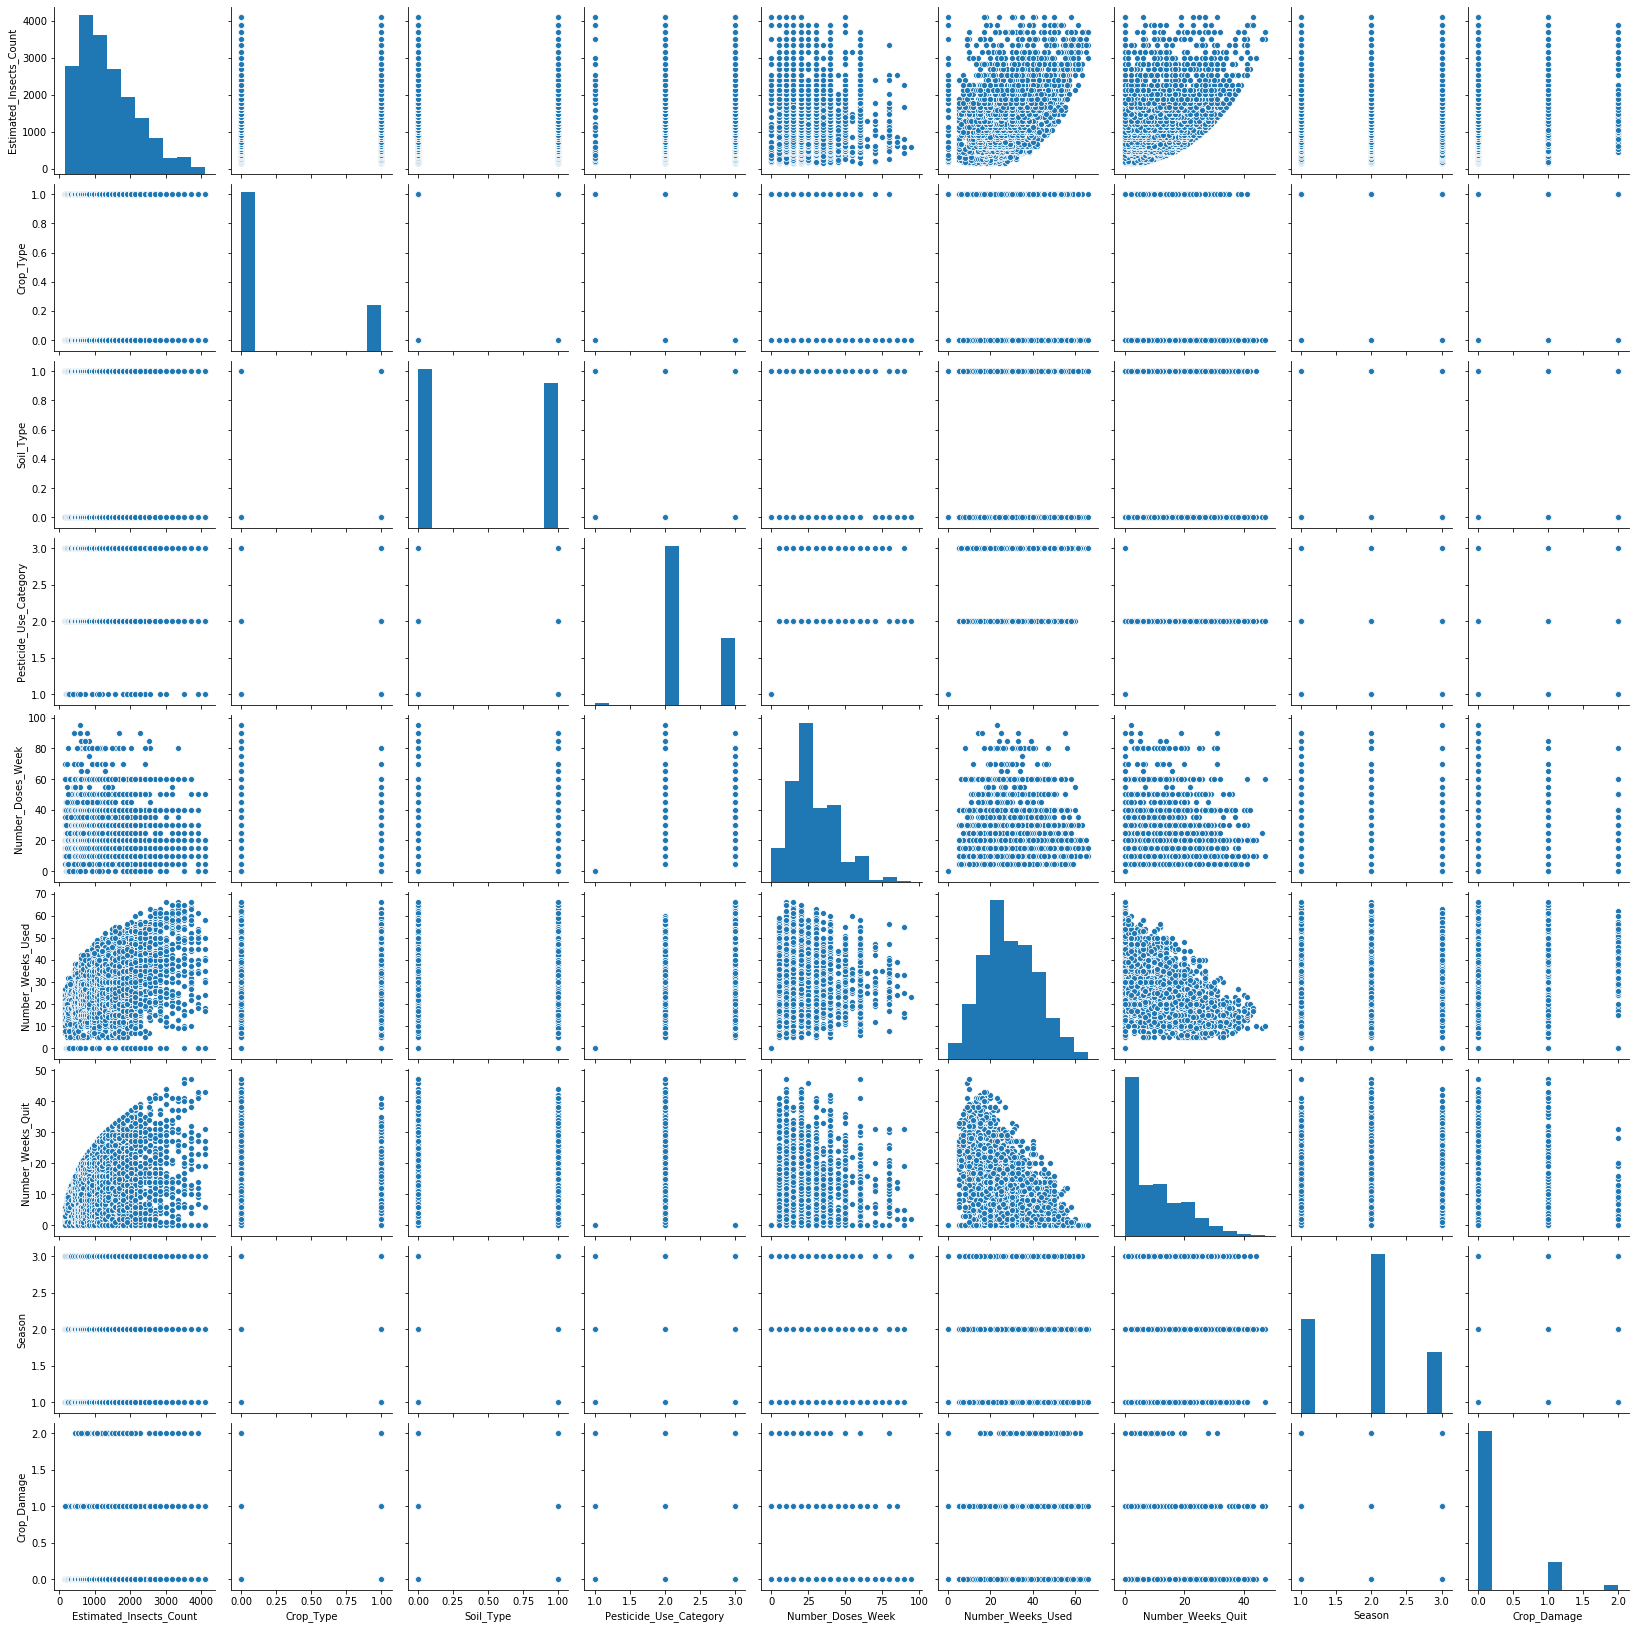

In [19]:
sns.pairplot(df1)

## Missing value treatment

In [20]:
#Filling the missing values with mode
df1['Number_Weeks_Used'].fillna(df1['Number_Weeks_Used'].mode()[0], inplace=True)

In [21]:
df1.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

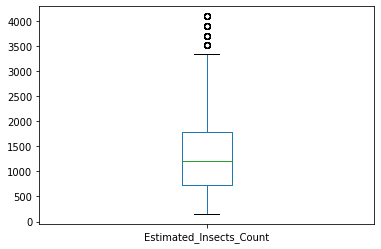

In [22]:
#Here, we have only 1 numerical column which is prone to outliers, i.e. Estimated_Insects_Count
df1['Estimated_Insects_Count'].plot(kind='box')
#As we can see, there are no outliers present in the dataset

In [23]:
#Let's split the data into numerical and categorical columns
num_col = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
cat_col = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']
y_col=['Crop_Damage']

In [24]:
#Scaling the numerical columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1[num_col]=ss.fit_transform(df1[num_col])

In [25]:
#Splitting the data in x and y variables
x = df1.drop('Crop_Damage',1) 
y = df1['Crop_Damage']

In [26]:
#Getting the Dummy variables
x=pd.get_dummies(x) 
df1=pd.get_dummies(df1) 
df2=pd.get_dummies(df2)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [28]:
#Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(3679, 8) 		 (920, 8)


In [29]:
# Importing the model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Error Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [30]:
#Finding Best Parameters
#Using GridsearchCV to find out the best parameter in LogisticRegression

parameters={'C':[1,10], 'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [31]:
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 24}


In [32]:
# Models with its best parameters

LR= LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=24)
SVC=SVC()

In [33]:
#Applying all the algorithms using for loop
model=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is
0.8260869565217391
[[754  10   0]
 [127   6   0]
 [ 21   2   0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       764
           1       0.33      0.05      0.08       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.39      0.34      0.33       920
weighted avg       0.74      0.83      0.76       920

*****************************************************


Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is
0.8206521739130435
[[719  45   0]
 [ 97  36   0]
 [ 16   7   0]]
              precisio

### Cross Validation of Models

In [34]:
#Applying all the algorithms using for loop
models=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]

for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model: ',m)
    print('Score: ',score)
    print('Mean Score: ',score.mean())
    print('Standard Deviation', score.std())
    print('***********************************************')
    print('\n')

Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score:  [0.74565217 0.81521739 0.82608696 0.83043478 0.83043478 0.83043478
 0.73478261 0.84782609 0.83913043 0.83224401]
Mean Score:  0.8132244008714598
Standard Deviation 0.037426293482871194
***********************************************


Model:  GaussianNB(priors=None, var_smoothing=1e-09)
Score:  [0.57173913 0.81521739 0.77391304 0.84347826 0.82826087 0.81304348
 0.45       0.85652174 0.81086957 0.84749455]
Mean Score:  0.7610538031637776
Standard Deviation 0.12991336177548093
***********************************************


Model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, ga

Using the above models, SVC has given the best score of 82.4. Now we are going to use the boosting technique to further improve the score

## Ensembling

In [35]:
#Importing the ensembling Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
#Applying all the algorithms using for loop
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************')
    print('\n')

Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is
0.8304347826086956
[[740  23   1]
 [106  24   3]
 [ 20   3   0]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       764
           1       0.48      0.18      0.26       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.44      0.38      0.39       920
weighted avg       0.78      0.83      0.

In [37]:
#Cross validation of scores after boosting
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model: ',m)
    print('Score: ',score)
    print('Mean Score: ',score.mean())
    print('Standard Deviation', score.std())
    print('***********************************************')
    print('\n')

Model:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score:  [0.69130435 0.80869565 0.7826087  0.83043478 0.74347826 0.80869565
 0.67608696 0.83043478 0.78043478 0.82788671]
Mean Score:  0.7780060623283129
Standard Deviation 0.053845395087825765
***********************************************


Model:  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Score:  [0.7173913  0.82173913 0.82826087 0.83043478 0.8304

In [38]:
#Saving our model
from sklearn.externals import joblib
joblib.dump(SVC,'Agri.obj')

['Agri.obj']